<b> <u>I. Sampling from a known distribution using CDF inversion </u></b>

In [6]:
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from extreme_value_sampling import *

- Function to generate a Monte Carlo dataset from the lognormal distribution:

In [7]:
# sample from log normal distribution
def log_normal(N,mu,sigma):
    log_normal_samples = np.random.lognormal(mu, sigma, N) 
    return log_normal_samples


- The method of sampling used in the code is random.

In [8]:
 log_hyperbolic_samples = log_hyperbolic_sampling(N = 10000, phi = 1, gamma = 2, mu = 1, delta = 1)

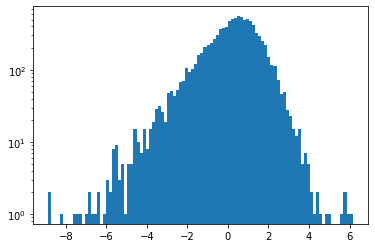

In [8]:
plt.hist(np.log(log_hyperbolic_samples), log=True, bins=100)
plt.show()


a)  The log-log plot is bell shaped which is negatively skewed with more extreme values to the left. The mean value seems to be at 1 as expected.


<b><u> II. Exploratory data analysis </u> </b>

In [9]:
log_normal_samples = log_normal(1000,1,1)
log_hyperbolic_samples = log_hyperbolic_sampling(N = 1000, phi = 1, gamma = 2, mu = 1, delta = 1)

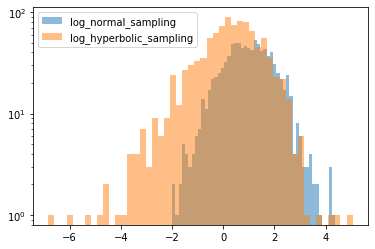

In [4]:
plt.hist(np.log(log_normal_samples),bins = 50, alpha=0.5, log = True, label = 'log_normal_sampling')
plt.hist(np.log(log_hyperbolic_samples),bins = 50, alpha=0.5, log = True, label = 'log_hyperbolic_sampling')
plt.legend()


b) log normal dataset shows a Gaussian pattern with its bell shape and the mean value at 1 as expected. The log hyperbolic dataset however seems to pull the mean value a bit to the left with more its extreme values being on the lower end.Because of the same reason, the right slope of the curve look similar in the two datasets whereas the left one has different slopes.

Text(0.5, 1.0, 'Quantile-Quantile plot')

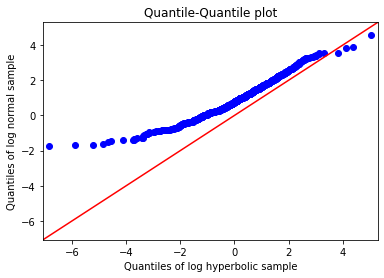

In [11]:
from statsmodels.graphics.gofplots import qqplot_2samples
qqplot_2samples(np.log(log_normal_samples),np.log(log_hyperbolic_samples),line='45')
plt.xlabel('Quantiles of log hyperbolic sample')
plt.ylabel('Quantiles of log normal sample')
plt.title('Quantile-Quantile plot')

c) The log distributions of the datasets seem to align closer to the 45 degrees slope on the upper quantiles. This indicates that the two datasets have similar distributions on the higher values/quantiles, which corroborates with the histograms above.

Text(0.5, 1.0, 'Log-hyperbolic dataset')

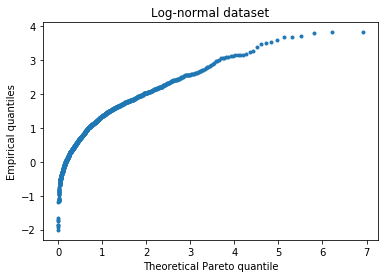

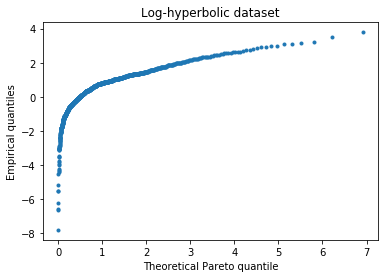

In [10]:
#Pareto Quantile
def pareto_quantile(data):
    # -log(P(X > x)) vs log(x)
    ## Note here -log(P(X > x)) is not the theoretical quantile of Pareto distribution. 
    ## Theoretical Pareto quantile is exp(-log(P(X>x))) 
    ## In fact, -log(P(X > x)) is the theoretical quantile of exponential distribution. Please refer to the next section. 
    
    data = np.sort(data)[::-1]
    n = len(data)
    P_X_larger_x = np.arange(1,n+1)/(n+1)
    fig = plt.figure()
    plt.plot(-np.log(P_X_larger_x), np.log(data),'.')
    plt.xlabel('Theoretical Pareto quantile')
    plt.ylabel('Empirical quantiles')
    
pareto_quantile(log_normal_samples)
plt.title('Log-normal dataset')
pareto_quantile(log_hyperbolic_samples)
plt.title('Log-hyperbolic dataset')

Text(0.5, 1.0, 'Dataset 1')

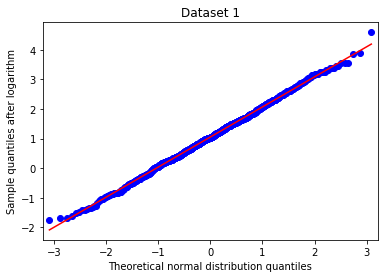

In [16]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.log(log_normal_samples), line= 's')
plt.xlabel('Theoretical normal distribution quantiles')
plt.ylabel('Sample quantiles after logarithm')
plt.title('Log Normal dataset')

Text(0.5, 1.0, 'Log Hyperbolic Dataset')

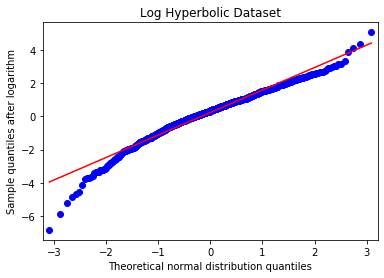

In [18]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.log(log_hyperbolic_samples), line= 's')
plt.xlabel('Theoretical normal distribution quantiles')
plt.ylabel('Sample quantiles after logarithm')
plt.title('Log Hyperbolic Dataset')

d) 
<i>Log-Normal Comparison:</i>
The log-normal dataset follows the 45 degree line of log-normality which is expected, whereas for the log-hyperbolic dataset, the lower quantiles (below -1) seem to deviate away from log-normality.This confirms the log-normality of the log-normal dataset obtained by Monte Carlo, and shows that only upper quantiles have log-normality in log-hyperbolic dataset.

<i>Pareto Comparison:</i>
Neither of the dataset- log-normal or log-hyperbolic show a complete pareto behavior as indicated by the non-straight lines. There seems to be a sharper straight line like behavior for the upper quantile values of log-hyperbolic dataset due to its negative skew. The log-normal however, does not show a straight line behavior in all quartiles.